### 1. Import the necessary libraries

In [434]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

### 2. Read the data as a data frame

In [435]:
# Read CSV and upload to dataframe
ins_df = pd.read_csv("insurance.csv")

In [436]:
ins_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### 3. Perform basic EDA which should include the following and print out your insights at every step.
#### a. Shape of the data
#### b. Data type of each attribute
#### c. Checking the presence of missing values
#### d. 5 point summary of numerical attributes
#### e. Distribution of ‘bmi’, ‘age’ and ‘charges’ columns.
#### f. Measure of skewness of ‘bmi’, ‘age’ and ‘charges’ columns
#### g. Checking the presence of outliers in ‘bmi’, ‘age’ and ‘charges columns
#### h. Distribution of categorical columns (include children)
#### i. Pair plot that includes all the columns of the data frame

In [437]:
#1. Shape of the data
print(ins_df.shape)

(1338, 7)


In [438]:
# Inference from Point-1
print("There are %d rows"%ins_df.shape[0])
print("There are %d columns"%ins_df.shape[1])

There are 1338 rows
There are 7 columns


In [439]:
#2. Data type of each attribute
ins_df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [440]:
# Inference from Point-2
print("There are 3 categorical variables as indentified by pandas")
print("1. Sex")
print("2. Smoker")
print("3. Region")
print("")
print("There are 4 continous/numeric variables as indentified by pandas")
print("1. Age")
print("2. BMI")
print("3. Charges")
print("4. Children")

There are 3 categorical variables as indentified by pandas
1. Sex
2. Smoker
3. Region

There are 4 continous/numeric variables as indentified by pandas
1. Age
2. BMI
3. Charges
4. Children


In [441]:
#3. Checking the presence of missing values
print(ins_df.info())
print("")
print("")
print("Missing Values: ")
print(ins_df.any().isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None


Missing Values: 
0


In [442]:
# Inference from Point-3
print("There are no missing values in dataset")

There are no missing values in dataset


In [443]:
#4. 5 point summary of numerical attributes
Five_point_summary=ins_df.describe()[3:].T
Five_point_summary

,min,25%,50%,75%,max
age,18.0000,27.00000,39.000,51.000000,64.00000
bmi,15.9600,26.29625,30.400,34.693750,53.13000
children,0.0000,0.00000,1.000,2.000000,5.00000
charges,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [576]:
# Inference from Point-4
range_children = Five_point_summary.loc['children','max'] - Five_point_summary.loc['children','min']
print("'children' has a small range of %d. Hence, can be taken as a categorical variable."%(range_children))

print("")

range_charges = Five_point_summary.loc['charges','max'] - Five_point_summary.loc['charges','min']
print("'charges' has large range of %f. It seems it has large number of HIGH Outliers"%(range_charges))

'children' has a small range of 5. Hence, can be taken as a categorical variable.

'charges' has large range of 62648.554110. It seems it has large number of HIGH Outliers


30.663396860986538
30.4
Inference from Distribution of 'bmi':
- Mean (30.0) ~ median (30.4)
- Most of the values lies between 20 and 40
- Therefore, Distribution of 'bmi' is almost symmetric or less skewed. It is actually very less positively skewed.


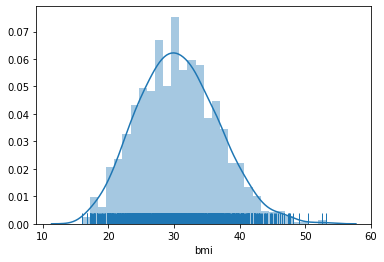

In [445]:
#5. Distribution of ‘bmi’, ‘age’ and ‘charges’ columns.

#Distribution of bmi
print(np.mean(ins_df['bmi']))
print(np.median(ins_df['bmi']))
sns.distplot(ins_df['bmi'], bins=30, rug=True)

# Inference from 'bmi'
print("Inference from Distribution of 'bmi':")
print("- Mean (30.0) ~ median (30.4)")
print("- Most of the values lies between 20 and 40")
print("- Therefore, Distribution of 'bmi' is almost symmetric or less skewed. It is actually very less positively skewed.")

39.20702541106129
39.0
Inference from Distribution of 'age':
- Mean (39.2) ~ median (39)
- Almost all of the values lies between 20 and 60 and there is very less variation
- Therefore, Distribution of 'bmi' is almost symmetric or less skewed.
- This is a bimodal Distribution with two peaks
- It indicates that it can be divided into two groups, from 20-40 and 45-65


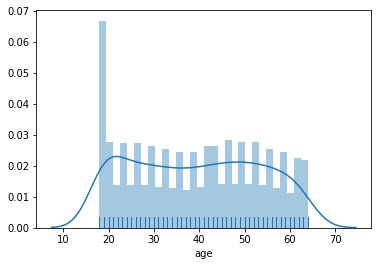

In [446]:
#Distribution of 'age'
print(np.mean(ins_df['age']))
print(np.median(ins_df['age']))
sns.distplot(ins_df['age'], bins=30, rug=True)

# Inference from 'age'
print("Inference from Distribution of 'age':")
print("- Mean (39.2) ~ median (39)")
print("- Almost all of the values lies between 20 and 60 and there is very less variation")
print("- Therefore, Distribution of 'bmi' is almost symmetric or less skewed.")
print("- This is a bimodal Distribution with two peaks")
print("- It indicates that it can be divided into two groups, from 20-40 and 45-65")

13270.422265141257
9382.033
Inference from Distribution of 'charges':
- Mean(13270.42) is greater than median(9382.03).
- Hence, it is rightly or positively skewed
- It's a bimodal distribution
- There are two peaks which indicates that there are two gropus, 2000-30000 and 35000-50000


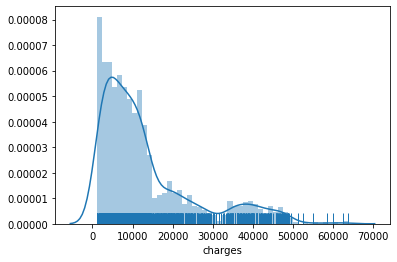

In [447]:
#Distribution of 'charges'
print(np.mean(ins_df['charges']))
print(np.median(ins_df['charges']))
sns.distplot(ins_df['charges'], bins=50, rug=True)

# Inference from 'charges'
print("Inference from Distribution of 'charges':")
print("- Mean(13270.42) is greater than median(9382.03).")
print("- Hence, it is rightly or positively skewed")
print("- It's a bimodal distribution")
print("- There are two peaks which indicates that there are two gropus, 2000-30000 and 35000-50000")

In [448]:
#6. Measure of skewness of ‘bmi’, ‘age’ and ‘charges’ columns.
skewness=ins_df.skew()
print(skewness.loc[['age','bmi','charges']])

age        0.055673
bmi        0.284047
charges    1.515880
dtype: float64


In [449]:
# Inference from Point-6
print("Skewness of 0.05 for 'age' indicates that it is very less positvely skewed which can be neglected in current context.")
print("Skewness of 0.28 for 'bmi' indicates that it is less positvely skewed. And there are some HIGH Outliers")
print("Skewness of 1.51 for 'charges' indicates that it is highly positively skewed. There are more HIGH Outliers than any other numeric variable.")

Skewness of 0.05 for 'age' indicates that it is very less positvely skewed which can be neglected in current context.
Skewness of 0.28 for 'bmi' indicates that it is less positvely skewed. And there are some HIGH Outliers
Skewness of 1.51 for 'charges' indicates that it is highly positively skewed. There are more HIGH Outliers than any other numeric variable.


In [450]:
#7. Checking the presence of outliers in ‘bmi’, ‘age’ and ‘charges columns
def printOutliers(x):
    Q1 = np.quantile(x, 0.25)
    Q3 = np.quantile(x, 0.75)
    IQR = Q3 - Q1
    LW = Q1 - 1.5 * IQR
    UW = Q3 + 1.5 * IQR
    series=x[(x < LW) |(x > UW)]
    if (len(series) > 0):
        print(series)
        print("")
        print("Inference: There are %d Outliers"%len(series))
    else:
        print("Inference: There are no outliers")

116     49.06
286     48.07
401     47.52
543     47.41
847     50.38
860     47.60
1047    52.58
1088    47.74
1317    53.13
Name: bmi, dtype: float64

Inference: There are 9 Outliers


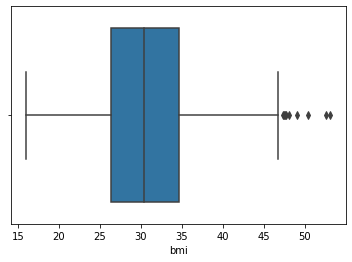

In [451]:
# Checking Outliers for 'bmi'
  
sns.boxplot(ins_df['bmi'])
printOutliers(ins_df['bmi'])

Inference: There are no outliers


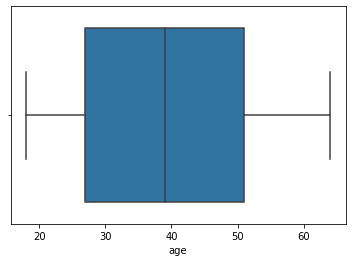

In [452]:
# Checking Outliers for 'age'

sns.boxplot(ins_df['age'])
printOutliers(ins_df['age'])

14      39611.75770
19      36837.46700
23      37701.87680
29      38711.00000
30      35585.57600
           ...     
1300    62592.87309
1301    46718.16325
1303    37829.72420
1313    36397.57600
1323    43896.37630
Name: charges, Length: 139, dtype: float64

Inference: There are 139 Outliers


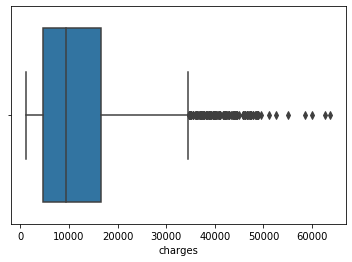

In [453]:
# Checking Outliers for 'charges'

sns.boxplot(ins_df['charges'])
printOutliers(ins_df['charges'])

In [454]:
# Inference from Point-7
print("There are very high number (139) of Outliers in 'charges' column")

There are very high number (139) of Outliers in 'charges' column


In [455]:
#Keep data frame for 'sex' and 'smoker' without encoding for future use
smoker_gender = ins_df[['sex','smoker']]
smoker_gender.head()

,sex,smoker
0,female,yes
1,male,no
2,male,no
3,male,no
4,male,no


In [456]:
# Encoding categorical variables into numeric
from sklearn import preprocessing
ins_df=ins_df.apply(preprocessing.LabelEncoder().fit_transform)

In [457]:
#8. Distribution of categorical columns (include children)

print("As we have seen above there are 4 categorical variables.")
print("1. Sex")
print("2. Smoker")
print("3. Region")
print("4. Children")

As we have seen above there are 4 categorical variables.
1. Sex
2. Smoker
3. Region
4. Children



There are almost equal proportion of both sex i.e. almost equal number of males and females
It also indicates that there is a uniform distribution



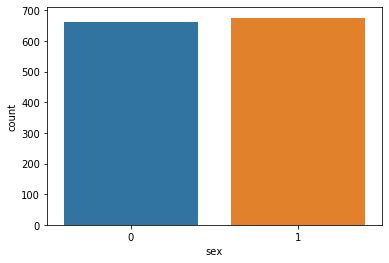

In [619]:
# Distribution of 'sex'
sns.countplot(ins_df['sex'])
print("")
print("There are almost equal proportion of both sex i.e. almost equal number of males and females")
print("It also indicates that there is a uniform distribution")
print("")


There are more non-smokers than that of smokers



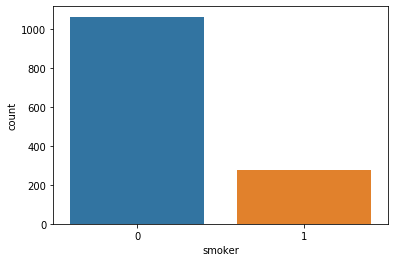

In [459]:
# Distribution of 'smoker'
sns.countplot(ins_df['smoker'])
print("")
print("There are more non-smokers than that of smokers")
print("")


Boxplot clealry indicates that 'region' is uniformaly distributed.
Boxplot also indicates that more than 50% of the people belongs to region-2 i.e. 'southeast'
That's why both 50% and 75% quartile are same i.e. 2



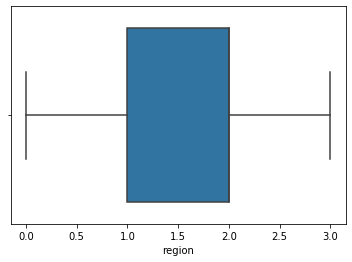

In [460]:
sns.boxplot(ins_df['region'])
print("")
print("Boxplot clealry indicates that 'region' is uniformaly distributed.")
print("Boxplot also indicates that more than 50% of the people belongs to region-2 i.e. 'southeast'")
print("That's why both 50% and 75% quartile are same i.e. 2")
print("")


Box plot clearly indicates that distribution for 'children' is righly skewed.
It also indicates that there are 25% of people who has no child
It also indicates that 50% of the people has max 1 child
It also indicates that there are 75% of people who has max 2 children



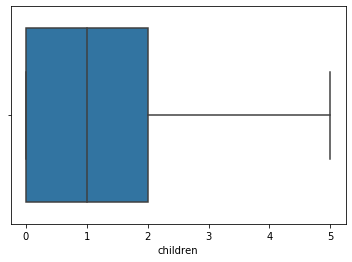

In [577]:
sns.boxplot(ins_df['children'])
print("")
print("Box plot clearly indicates that distribution for 'children' is righly skewed.")
print("It also indicates that there are 25% of people who has no child")
print("It also indicates that 50% of the people has max 1 child")
print("It also indicates that there are 75% of people who has max 2 children")
print("")

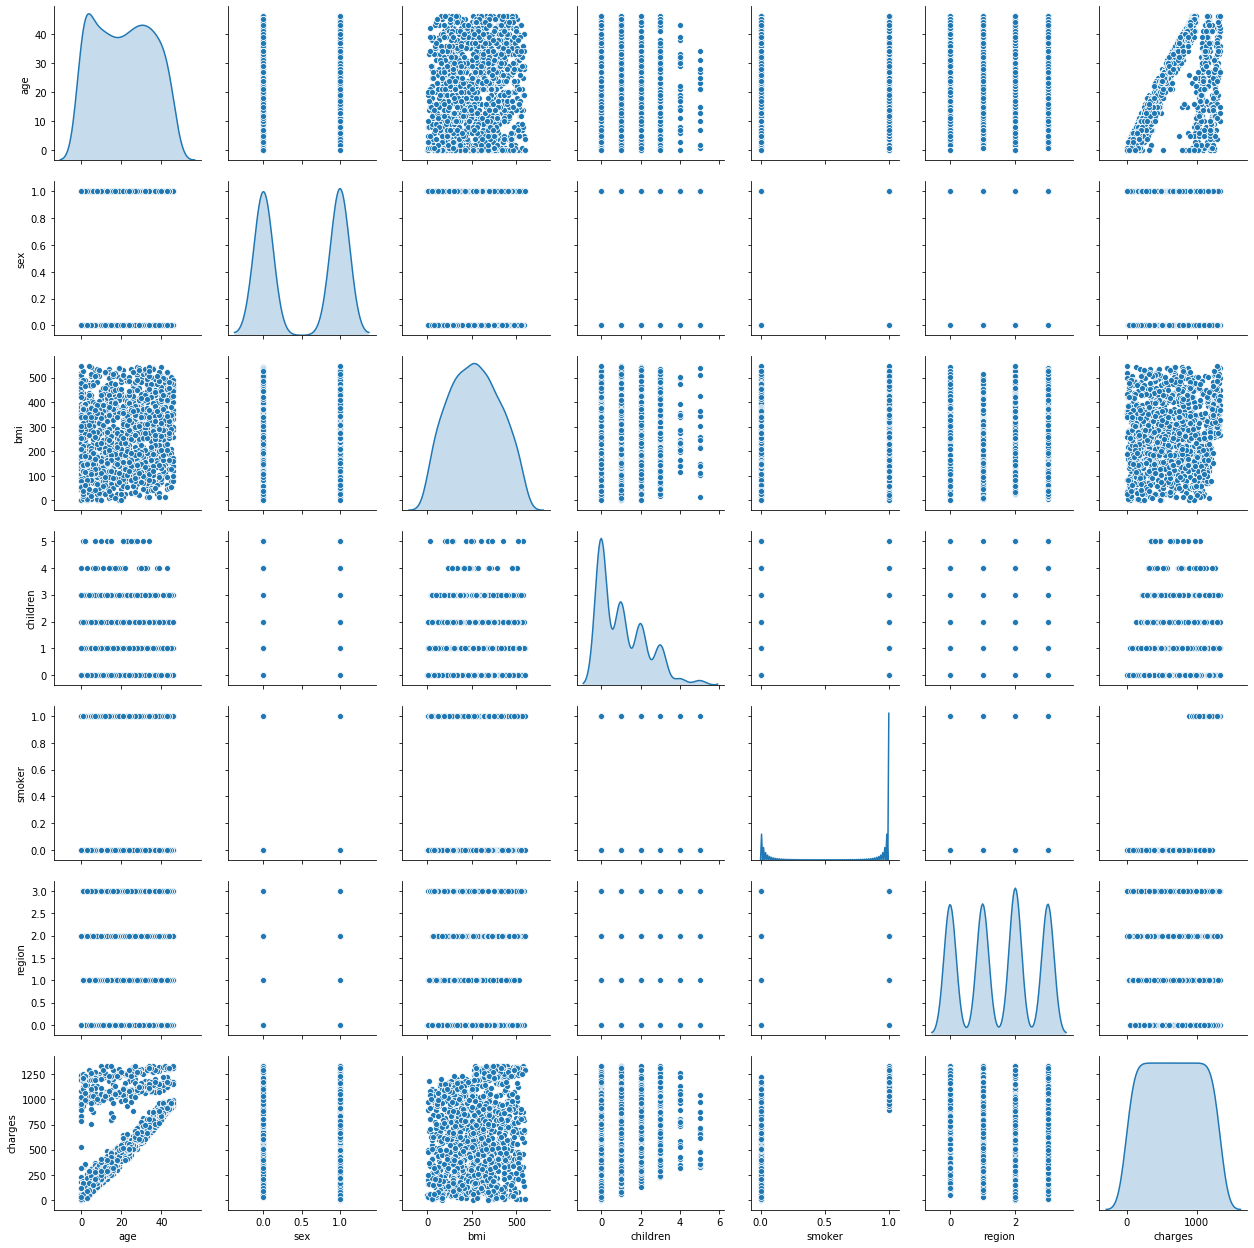

In [626]:
#9. Pair plot that includes all the columns of the dataframe
sns.pairplot(ins_df, diag_kind='kde')

In [585]:
# Inference from Point-9
print("Inference-1: Scatter plot between 'age' and 'charges' indicates that they are correlated")
print("")
print("Inference-2: Scatter plot between any two other numeric variables indicates that they have very poor correlation")
print("")
print("Inference-3: Strip plot between 'charges' and 'children' indicates that people with 4 or more children \
have lower individual medical costs billed by health insurance")
print("")
print("Inference-4: Strip plot between 'charges' and 'smoker' indicates that 'Smokers' have more charges than that \
of 'non-smokers'")
print("")

Inference-1: Scatter plot between 'age' and 'charges' indicates that they are correlated

Inference-2: Scatter plot between any two other numeric variables indicates that they have very poor correlation

Inference-3: Strip plot between 'charges' and 'children' indicates that people with 4 or more children have lower individual medical costs billed by health insurance

Inference-4: Strip plot between 'charges' and 'smoker' indicates that 'Smokers' have more charges than that of 'non-smokers'



### 4. Answer the following questions with statistical evidence

#### a. Do charges of people who smoke differ significantly from the people who don't?

#### b. Does bmi of males differ significantly from that of females?

#### c. Is the proportion of smokers significantly different in different genders?

#### d. Is the distribution of bmi across women with no children, one child and two children, the same ?

In [597]:
from scipy.stats import ttest_ind, chi2_contingency, f_oneway

In [465]:
def applyTest(X,Y,H0,H1,alpha):
    t_stastics,p_value=ttest_ind(X,Y)
    print(t_stastics,p_value)
    print("")
    print("p_value: %s"%p_value)
    print("Level Of Significance: %s"%alpha)
    if (p_value < alpha) :
        print("")
        print("p_value is less than Level Of Significance. So, we have enough evidance to reject null hypothesis.")
        print("")
        print("Inference: %s"%H1)
    else :
        print("")
        print("p_value is more than Level Of Significance. So, we don't have enough evidance to reject null hypothesis.")
        print("")
        print("Inference: %s"%H0)

We will use 2 Tailed T-Test

-32.4153714719311 1.5122171347006359e-170

p_value: 1.5122171347006359e-170
Level Of Significance: 0.05

p_value is less than Level Of Significance. So, we have enough evidance to reject null hypothesis.

Inference: Charges of people who smoke differ significantly from the people who don't


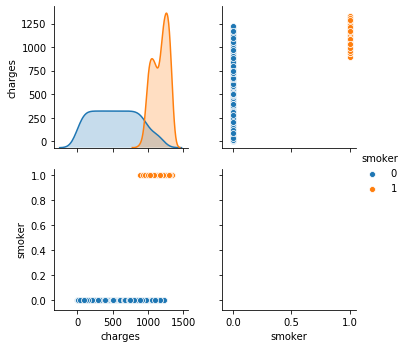

In [622]:
# Do charges of people who smoke differ significantly from the people who don't?
H0 = "Charges of people who smoke doesn't differ significantly from the people who don't"
H1 = "Charges of people who smoke differ significantly from the people who don't"

print("We will use 2 Tailed T-Test")

print("")
X = ins_df[ins_df['smoker']==0].charges
Y = ins_df[ins_df['smoker']==1].charges

applyTest(X,Y,H0,H1,alpha=0.05)
sns.pairplot(ins_df[['charges','smoker']], diag_kind='kde', hue='smoker')

We will use 2 Tailed T-Test

-1.6359921686049288 0.10207676631776744

p_value: 0.10207676631776744
Level Of Significance: 0.05

p_value is more than Level Of Significance. So, we don't have enough evidance to reject null hypothesis.

Inference: bmi of males doesn't differ significantly from that of females


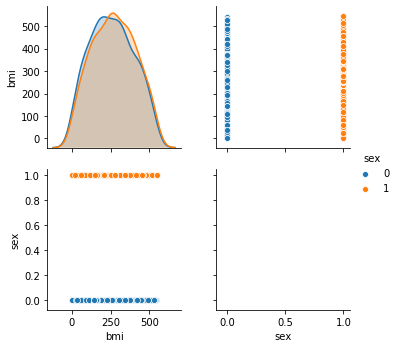

In [620]:
# Does bmi of males differ significantly from that of females?
H0 = "bmi of males doesn't differ significantly from that of females"
H1 = "bmi of males differ significantly from that of females"

print("We will use 2 Tailed T-Test")

print("")
X = ins_df[ins_df['sex']==0].bmi
Y = ins_df[ins_df['sex']==1].bmi

applyTest(X,Y,H0,H1,alpha=0.05)
sns.pairplot(ins_df[['bmi','sex']], diag_kind='kde', hue='sex')


We will use Two tailed Chi-Square Test

chi2 stat: 7.39291081459996
P-Value: 0.006548143503580696
Degree Of Freedome: 1
Contingency Table: 
[[537.56651719 138.43348281]
 [526.43348281 135.56651719]]

Level Of Significance: 0.01

p_value is less than Level Of Significance. So, we have enough evidance to reject null hypothesis.

Inference: The proportion of smokers significantly different in different genders


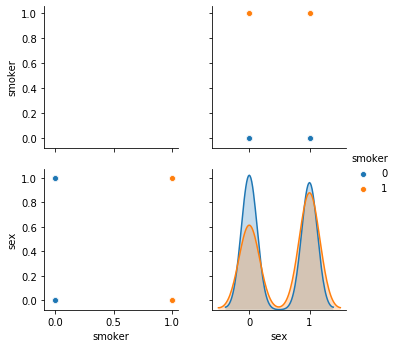

In [624]:
# Is the proportion of smokers significantly different in different genders?
H0 = "The proportion of smokers doesn't significantly different in different genders"
H1 = "The proportion of smokers significantly different in different genders"
alpha = 0.01

print("")
print("We will use Two tailed Chi-Square Test")
print("")

smoker_gender_female = smoker_gender[smoker_gender['sex']=='female'].groupby(['smoker']).count().iloc[:,0]
smoker_gender_female.name='female'
smoker_gender_male = smoker_gender[smoker_gender['sex']=='male'].groupby(['smoker']).count().iloc[:,0]
smoker_gender_male.name='male'
frequency_Table_df = pd.DataFrame()
frequency_Table_df=frequency_Table_df.append(smoker_gender_male)
frequency_Table_df=frequency_Table_df.append(smoker_gender_female)

chi2_stat,p_value,dof,cont_table = chi2_contingency(frequency_Table_df)

print("chi2 stat: %s"%chi2_stat)
print("P-Value: %s"%p_value)
print("Degree Of Freedome: %s"%dof)
print("Contingency Table: \n%s"%cont_table)
print("")
print("Level Of Significance: %s"%alpha)
if (p_value < alpha) :
    print("")
    print("p_value is less than Level Of Significance. So, we have enough evidance to reject null hypothesis.")
    print("")
    print("Inference: %s"%H1)
else :
    print("")
    print("p_value is more than Level Of Significance. So, we don't have enough evidance to reject null hypothesis.")
    print("")
    print("Inference: %s"%H0)

sns.pairplot(ins_df[['smoker','sex']], diag_kind='kde', hue='smoker')

                sum_sq     df         F    PR(>F)
children  1.256848e+04    1.0  0.651487  0.419918
Residual  1.099643e+07  570.0       NaN       NaN

P-Value: 0.419918

Level Of Significance: 0.05

p_value (0.419918) is greater than Level Of Significance (5%).

So, we don't have enough evidence to reject null hypothesis.

Inference: distribution of bmi across women with no children, one child and two children, the same


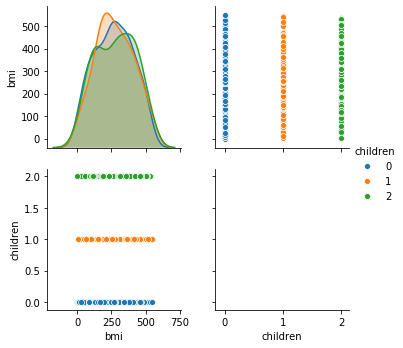

In [625]:
# Is the distribution of bmi across women with no children, one child and two children, the same
import statsmodels.api         as     sm
from   statsmodels.formula.api import ols

H0 = "distribution of bmi across women with no children, one child and two children, the same"
H1 = "distribution of bmi across women with no children, one child and two children, not the same"

female = ins_df[(ins_df['sex']==1) & (ins_df['children']<3)][['bmi','children']]
 
mod = ols('bmi ~ children', data = female).fit()
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

print("")
p_value = aov_table.iloc[0,3]
print("P-Value: %f"%p_value)
alpha = 0.05
print("")
print("Level Of Significance: %s"%alpha)

if (p_value > alpha):
    print("")
    print("p_value (0.419918) is greater than Level Of Significance (5%).")
    print("")
    print("So, we don't have enough evidence to reject null hypothesis.") 
    print("")
    print("Inference: %s"%H0)
sns.pairplot(female, diag_kind='kde',hue='children')